In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from aging.plotting import format_plots, PlotConfig, save_factory, figure, ONTOGENY_AGE_CMAP
from aging.behavior.pseudotime import compute_pseudotime, pseudotime_springplot

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "pseudotime", tight_layout=False)

In [3]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_07/ontogeny_males_clean_v2.parquet')

In [4]:
def remove_crl(df):
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [5]:
df

relabeled_syllables                                                                                             0   \
age subject_name session_name          uuid                                 date                velocity             
3   m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853 2021-10-29 11:44:38 1.774870  0.069469   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56 2023-06-05 13:10:18 2.099952  0.053075   
    m12b04c03    ontogeny_cohorts_3wks 8a69a400-d4c6-4e3a-a1ce-90fd44e2b211 2021-10-29 11:45:21 1.430512  0.089396   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439 2023-06-05 13:10:02 2.303331  0.058875   
    m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a 2021-10-29 11:44:50 1.776810  0.079073   
...                                                                                                            ...   
90  c04_m02_b02  ontogeny_males_90w    7a5f5257-fd29-4451-9680-b2cee905c337 2023-06-05 12:26:37 1.491503  0.023407   
    c01_m03_b03  ontogeny_males_90w    b7b7dfa0-66e1-4f48-a118-2fec4b8ce144 2023-06-05 09:40:36 1.595420  0.026862   
    c01_m04_b04  ontogeny_males_90w    e272b7f4-3fe2-4fba-8ae9-0b1f8da43f69 2023-06-05 09:41:53 1.564247  0.013029   
    c02_m03_b03  ontogeny_males_90w    0278ad72-da90-4ca6-b7a3-ba05df7e0751 2023-06-05 11:01:42 1.685820  0.020367   
    c03_m04_b04  ontogeny_males_90w    791599d2-5a73-485b-8d0e-3be0a239f8ea 2023-06-05 11:47:58 1.294072  0.024254   

relabeled_syllables                                                                                             1   \
age subject_name session_name          uuid                                 date                velocity             
3   m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853 2021-10-29 11:44:38 1.774870  0.011115   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56 2023-06-05 13:10:18 2.099952  0.020833   
    m12b04c03    ontogeny_cohorts_3wks 8a69a400-d4c6-4e3a-a1ce-90fd44e2b211 2021-10-29 11:45:21 1.430512  0.005429   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439 2023-06-05 13:10:02 2.303331  0.012824   
    m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a 2021-10-29 11:44:50 1.776810  0.011247   
...                                                                                                            ...   
90  c04_m02_b02  ontogeny_males_90w    7a5f5257-fd29-4451-9680-b2cee905c337 2023-06-05 12:26:37 1.491503  0.026287   
    c01_m03_b03  ontogeny_males_90w    b7b7dfa0-66e1-4f48-a118-2fec4b8ce144 2023-06-05 09:40:36 1.595420  0.030086   
    c01_m04_b04  ontogeny_males_90w    e272b7f4-3fe2-4fba-8ae9-0b1f8da43f69 2023-06-05 09:41:53 1.564247  0.060442   
    c02_m03_b03  ontogeny_males_90w    0278ad72-da90-4ca6-b7a3-ba05df7e0751 2023-06-05 11:01:42 1.685820  0.070117   
    c03_m04_b04  ontogeny_males_90w    791599d2-5a73-485b-8d0e-3be0a239f8ea 2023-06-05 11:47:58 1.294072  0.041352   

relabeled_syllables                                                                                             2   \
age subject_name session_name          uuid                                 date                velocity             
3   m09b01c03    ontogeny_cohorts_3wks 8e6b7f38-4f76-4307-81b2-129dc9016853 2021-10-29 11:44:38 1.774870  0.004168   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56 2023-06-05 13:10:18 2.099952  0.011409   
    m12b04c03    ontogeny_cohorts_3wks 8a69a400-d4c6-4e3a-a1ce-90fd44e2b211 2021-10-29 11:45:21 1.430512  0.005067   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439 2023-06-05 13:10:02 2.303331  0.007287   
    m10b02c03    ontogeny_cohorts_3wks e953b275-d126-4a37-888a-7df0af565c0a 2021-10-29 11:44:50 1.776810  0.009884   
...                                                                                                     

In [6]:
pseudo_df = compute_pseudotime(df, remove_crl, k_neigh=6)
pseudo_df.reset_index().loc[:, ['pseudotime_rank', 'age']].corr(method='spearman')

  0%|          | 0/5000 [00:00<?, ?it/s]

,pseudotime_rank,age
pseudotime_rank,1.000000,0.870003
age,0.870003,1.000000


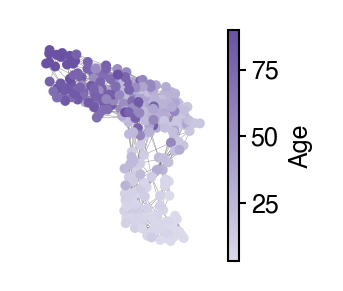

In [7]:
graph, pos, c, fig = pseudotime_springplot(
    df,
    remove_crl,
    # xform_fun=zscore,
    k_neigh=6,
    seed=2,
    node_size=2.5,
    cmap=ONTOGENY_AGE_CMAP,
)
saver(fig, "pseudotime-ontogeny-spring");

In [8]:
scatter_pos = np.array(list(pos.values()))

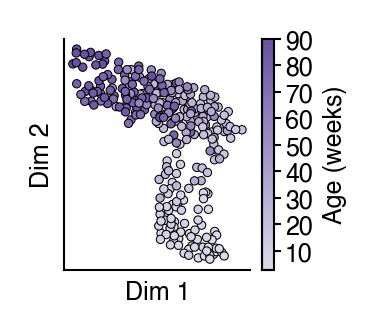

In [9]:
fig = figure(1, 1)
ax = fig.gca()
im = ax.scatter(
    *scatter_pos.T,
    c=c,
    cmap=ONTOGENY_AGE_CMAP,
    s=4,
    lw=0.25,
    ec='k',
    # rasterized=True,
    #norm='log'
)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
cb = fig.colorbar(im, ax=ax, label="Age (weeks)")
cb.set_ticks(np.arange(10, 100, 10, dtype='int'))
cb.set_ticks([], minor=True)
sns.despine()
saver(fig, "pseudotime-ontogeny");